In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-breed-identification/sample_submission.csv
/kaggle/input/dog-breed-identification/labels.csv
/kaggle/input/dog-breed-identification/test/09e51e17e2b756ff2ace8a87bd1443fa.jpg
/kaggle/input/dog-breed-identification/test/f7a32505c12649183c5991ecfa7d68b3.jpg
/kaggle/input/dog-breed-identification/test/bc6d50ffb4644feb34530aa58943e85b.jpg
/kaggle/input/dog-breed-identification/test/7cbc041e79135a572aad87904b5c9c57.jpg
/kaggle/input/dog-breed-identification/test/f3b603f10d6a344f0395fb46b242ff8e.jpg
/kaggle/input/dog-breed-identification/test/db55098d859d27a3c05b0e3fc41d43e7.jpg
/kaggle/input/dog-breed-identification/test/665bab06a3ea861c0812c778486988e3.jpg
/kaggle/input/dog-breed-identification/test/7b57911ea7559cebd6db308125926642.jpg
/kaggle/input/dog-breed-identification/test/df0d6ba158287cb2b3ed6459a22d42ba.jpg
/kaggle/input/dog-breed-identification/test/b80d89ad4a17ac2537ff46d251efcd7c.jpg
/kaggle/input/dog-breed-identification/test/06ecb29a374579fb320c1c7d2801cbe1.jp

Loading the Libraries

In [42]:
# Importing Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

from matplotlib.pyplot import imread
from IPython.display import display, Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version: ", tf.__version__)
print("TF Hub Version: ", hub.__version__)


TF Version:  2.6.4
TF Hub Version:  0.12.0


Getting the labels

In [43]:
labels_csv=pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

EDA

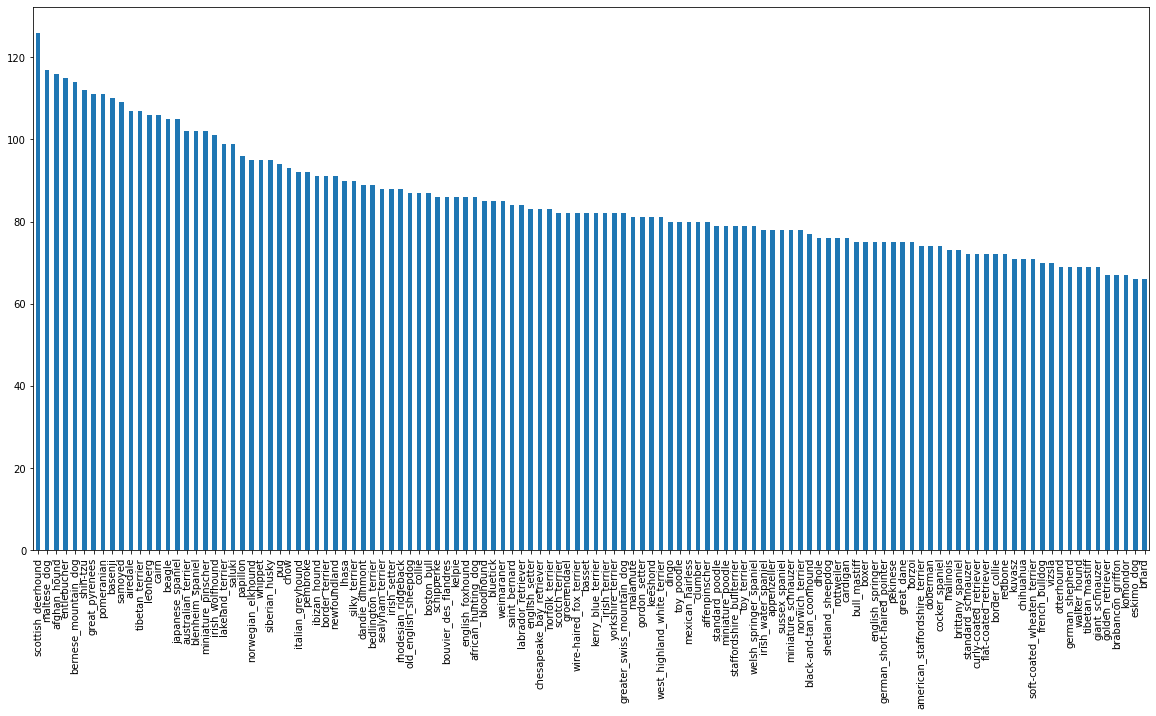

In [44]:
labels_csv["breed"].value_counts().plot(kind="bar", figsize=(20, 10));



In [45]:
np.mean(labels_csv["breed"].value_counts()), np.median(labels_csv["breed"].value_counts())


(85.18333333333334, 82.0)

Averge breed count is 82

In [46]:
# Create pathnames from image ID's


Getting the images AND Labels

In [47]:

imgs=["/kaggle/input/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]
imgs[0:5]


['/kaggle/input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/kaggle/input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/kaggle/input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/kaggle/input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/kaggle/input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [48]:
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [49]:
len(labels)


10222

In [50]:
len(imgs)

10222

Labels and images are of same number 

In [51]:
# Find all unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [52]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [53]:
# Setting up X and y variables
x= imgs
y = boolean_labels

In [54]:
# Number of images used for experimenting
NUM_IMAGES = 1000 
NUM_IMAGES

1000

In [55]:
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [56]:
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [57]:
x_train[:1], y_train[:1]


(['/kaggle/input/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, Fals

processing the images (Turning the images into Tensors)¶


In [58]:
image1 = imread(imgs[200])
image2 = imread(imgs[300])
image1.shape, image2.shape

((374, 500, 3), (300, 400, 3))

In [59]:
# Defining the IMAGE_SIZE
IMG_SIZE = 224

def process_image(image_path):
    """
    Takes an image file path and turns it into a Tensor.
    """
    # Read in image file
    image = tf.io.read_file(image_path)
    # Turn the jpg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the colour channel values from 0-255 values to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to our desired size (224, 224)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    
    return image


In [60]:
# Function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path and the associated label,
    preprocess the image and returns in form of a tuple (image, label).
    """
    image = process_image(image_path)
    return image, label

In [61]:
BATCH_SIZE = 32

# Turn the data into batches
def create_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image (x) and label (y) pairs.
    Shuffles the data if it is given training data but does not shuffle if it is validation data.
    Also accepts test data as input (no labels).
    """
    if test_data:
        # This is test data i.e. it does not contain labels.
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    elif valid_data:
        # This is validation data so no need to shuffle it.
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        # This is training data so it is shuffled.
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                   tf.constant(y))) # labels
        
        # Shuffling filepaths and lavels before mapping image processor function (Faster)
        data = data.shuffle(buffer_size=len(x))
        
        # Create (image, label) tuples
        data = data.map(get_image_label)
        
        # Turn the data into batches
        data_batch = data.batch(BATCH_SIZE)
        
    return data_batch

In [62]:
# Create training and validation data batches
train_data = create_batches(x_train, y_train)
val_data = create_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [63]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [64]:
#Function to show images
def show_16_images(images, labels):
    """
    Displays 16 images from a data batch.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    # Loop through 16 images
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn grid lines off
        plt.axis("off")

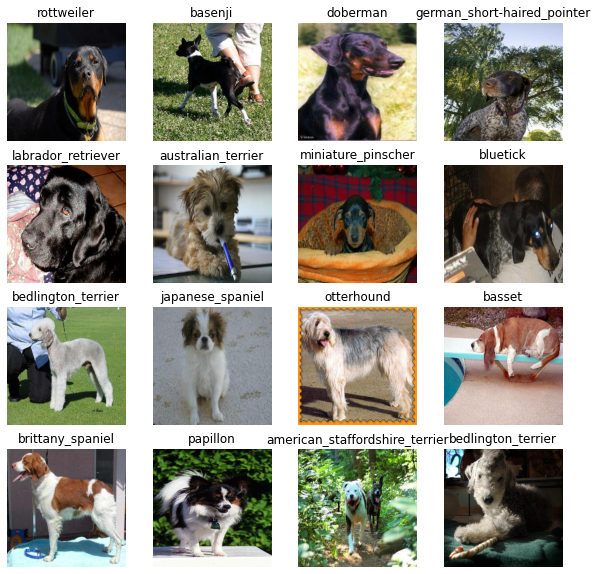

In [65]:
# Training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_16_images(train_images, train_labels)


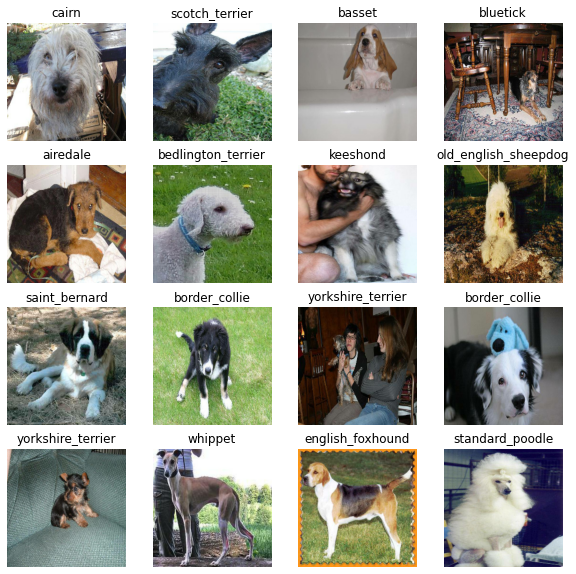

In [66]:
# Validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_16_images(val_images, val_labels)

Building a model


In [67]:
#  Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"



In [68]:
# Create function build Keras Model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with: ", model_url)
    
    # Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), # Layer 1 (Input Layer)
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation="softmax") # Layer 2 (Output Layer)
    ])
    
    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    
    # Build the model
    model.build(INPUT_SHAPE)
    
    return model

In [69]:
# Creating a model
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_1 (Dense)              (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [70]:
# TensorBoard Callback¶


In [71]:
# Loading the tensorboard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [72]:
# Function to build TensorBoard Callback
def create_tensorboard_callback():
    logdir = os.path.join("/kaggle/working/logs/",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [73]:
# Create early stopping callback (stops training when model stops improving)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # Stops after 3 non improving models

In [74]:
# Set number of epochs
NUM_EPOCHS = 100

In [75]:
# Train and return the model

def train_model():
    """
    Trains a given model and returns the trained model.
    """
    
    # Create a model
    model = create_model()
    
    # Create new TensorBoard session
    tensorboard = create_tensorboard_callback()
    
    # Fit the model to the data
    model.fit(x=train_data, 
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,
              callbacks=[tensorboard, early_stopping])
    
    return model

In [76]:
# Fit model to the data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


2023-01-15 07:39:16.242898: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-15 07:39:16.243090: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-01-15 07:39:16.244249: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/100
 1/25 [>.............................] - ETA: 2:05 - loss: 5.9998 - accuracy: 0.0000e+00

2023-01-15 07:39:21.920137: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-15 07:39:21.920302: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/25 [=>............................] - ETA: 21s - loss: 5.6600 - accuracy: 0.0312     

2023-01-15 07:39:22.491505: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-01-15 07:39:22.504800: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-01-15 07:39:22.523130: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/20230115-073916/train/plugins/profile/2023_01_15_07_39_22

2023-01-15 07:39:22.528425: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs/20230115-073916/train/plugins/profile/2023_01_15_07_39_22/b20c14e70770.trace.json.gz
2023-01-15 07:39:22.559370: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/20230115-073916/train/plugins/profile/2023_01_15_07_39_22

2023-01-15 07:39:22.563159: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to /kaggle/working/

25/25 [==============================] - 22s 707ms/step - loss: 4.5358 - accuracy: 0.0938 - val_loss: 3.3854 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 15s 587ms/step - loss: 1.5902 - accuracy: 0.6938 - val_loss: 2.1736 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 15s 615ms/step - loss: 0.5412 - accuracy: 0.9425 - val_loss: 1.6872 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 15s 588ms/step - loss: 0.2481 - accuracy: 0.9900 - val_loss: 1.4993 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 16s 629ms/step - loss: 0.1480 - accuracy: 0.9925 - val_loss: 1.4083 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 14s 581ms/step - loss: 0.0997 - accuracy: 1.0000 - val_loss: 1.3510 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 15s 585ms/step - loss: 0.0753 - accuracy: 1.0000 - val_loss: 1.3342 - val_accuracy: 0.6500
Epoc

In [77]:
%tensorboard --logdir /kaggle/working/logs


In [78]:
# Make Predictions on the validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 4s 414ms/step


array([[1.0913723e-03, 5.6947978e-05, 4.2633808e-04, ..., 7.9505255e-05,
        1.0897800e-04, 1.4743133e-03],
       [8.1053912e-04, 2.8414108e-04, 1.7832035e-02, ..., 3.0510282e-04,
        1.8266024e-03, 5.4732813e-05],
       [6.6919415e-07, 2.9767798e-06, 9.7148977e-06, ..., 4.5103837e-07,
        6.7677352e-06, 7.5714338e-06],
       ...,
       [1.0013008e-05, 8.0445003e-05, 6.6592838e-06, ..., 1.0169488e-05,
        3.2131255e-05, 3.8959693e-05],
       [1.7931188e-03, 1.3514429e-04, 9.0160058e-05, ..., 1.2015238e-04,
        3.1322703e-05, 2.7851847e-03],
       [5.6207708e-05, 2.7504337e-05, 1.1881738e-03, ..., 4.9003595e-03,
        3.5924385e-03, 1.2066448e-04]], dtype=float32)

In [79]:
predictions.shape


(200, 120)

In [80]:
def get_pred_label(prediction_probabilities):
    """
    Turns array of prediction probabilities into a label.
    """
    
    return unique_breeds[np.argmax(prediction_probabilities)]

In [81]:
def unbatch_data(data):
    """
    Takes a batched dataset of (image, label) Tensors and returns separate arrays
    of images and labels.
    """
    images=[]
    labels=[]
    
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

In [82]:
val_images, val_labels = unbatch_data(val_data)

In [83]:
# Change n to change the sample image which is predicted
def plot_pred(prediction_probabilities, labels, images, n=2):
    """
    View the prediction, ground truth label and image for sample n.
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    
    # Get the pred label
    pred_label = get_pred_label(pred_prob)
    
    # Plot image & remove ticks
    plt.imshow(image)
    plt.yticks([])
    
    # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    plt.title("{} {:2.0f}% ({})".format(pred_label,
                                        np.max(pred_prob)*100,
                                        true_label),
                                        color=color)

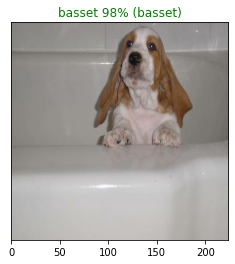

In [84]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [85]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plots the top 10 highest prediction confidences along with
    the truth label for sample n.
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]
    # Get the predicted label
    pred_label = get_pred_label(pred_prob)
    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                       top_10_pred_values, 
                       color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")
    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

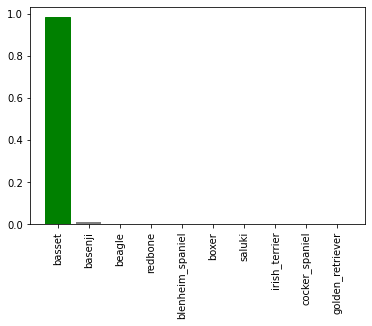

In [86]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=2)

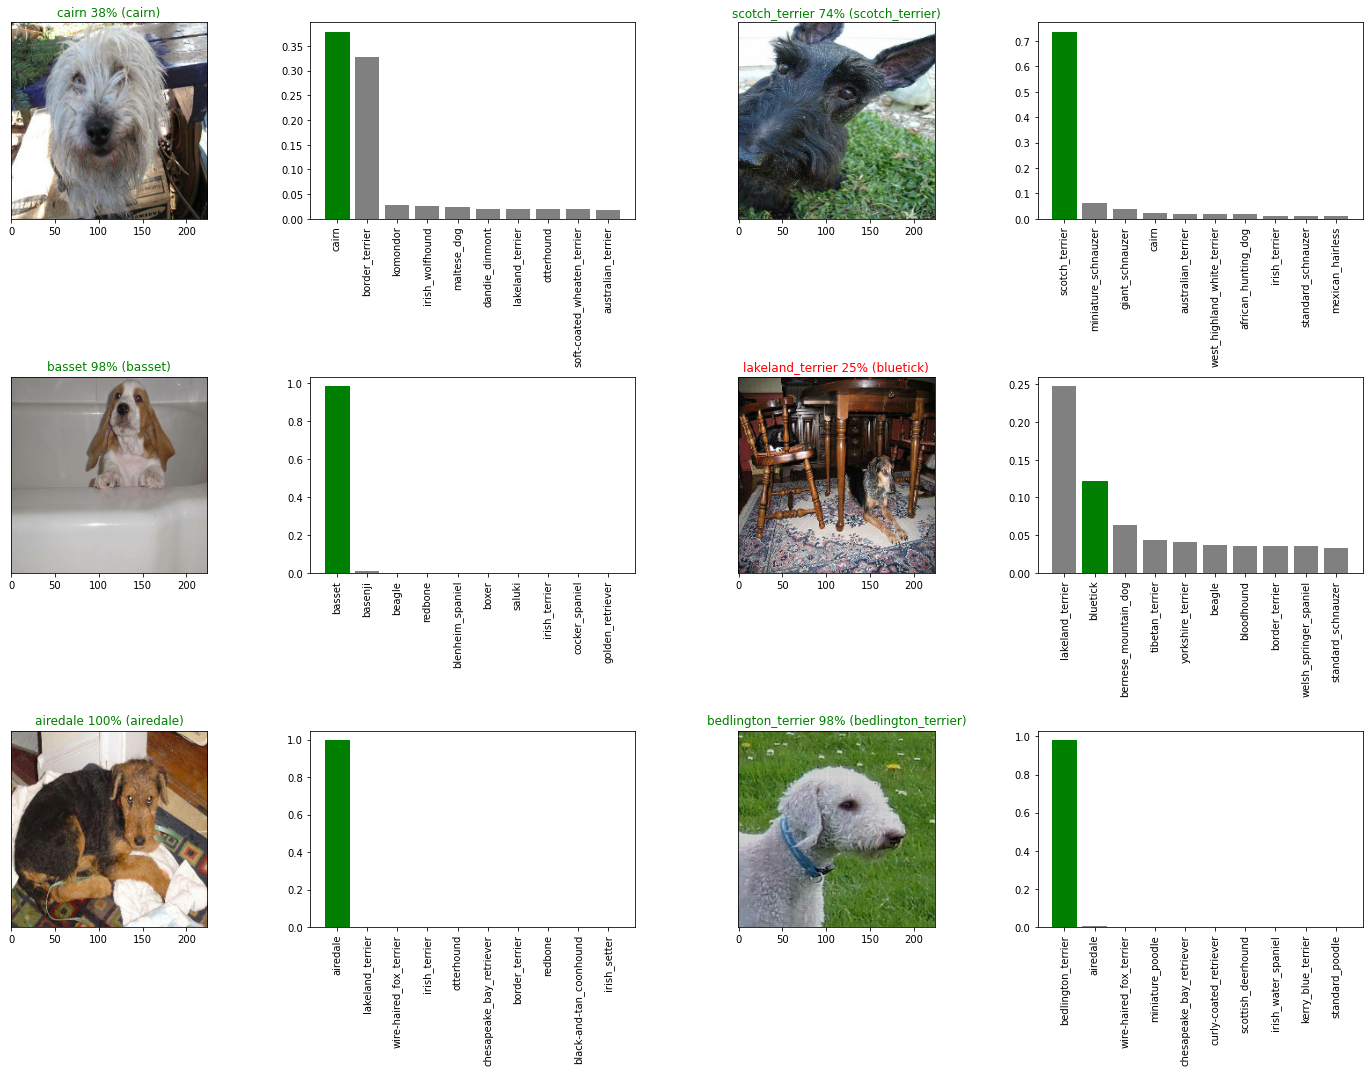

In [87]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

**Save the model**

In [88]:
def save_model(model, suffix=None):
    """
    Saves a given model in a models directory and appends suffix (str)
    for clarity and reuse
    """
    model_name = suffix + ".h5"
    print(f"Saving model {model_name}")
    model.save(model_name)
    return model_name

In [89]:
# Function to load model
def load_model(model_name):
    """
    Loads saved model.
    """
    print(f"Loading model {model_name}")
    model = tf.keras.models.load_model(model_name,
                                       custom_objects={"KerasLayer": hub.KerasLayer})
    return model

In [90]:
save_model(model, suffix="1000-images-Adam")


Saving model 1000-images-Adam.h5


'1000-images-Adam.h5'

In [91]:
model_1000_images = load_model("/kaggle/working/1000-images-Adam.h5")


Loading model /kaggle/working/1000-images-Adam.h5


In [92]:
model.evaluate(val_data)


7/7 [==============================] - 3s 398ms/step - loss: 1.2045 - accuracy: 0.6850


[1.2045334577560425, 0.6850000023841858]

In [93]:
model_1000_images.evaluate(val_data)


7/7 [==============================] - 5s 518ms/step - loss: 1.2045 - accuracy: 0.6850


[1.2045334577560425, 0.6850000023841858]

In [95]:
len(x), len(y)


(10222, 10222)

In [96]:
full_data = create_batches(x, y)


Creating training data batches...


In [97]:
full_model = create_model()


Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [99]:
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

2023-01-15 08:04:46.633316: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-15 08:04:46.633375: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-01-15 08:04:46.634990: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [100]:
%tensorboard --logdir /kaggle/working/logs


Reusing TensorBoard on port 6006 (pid 479), started 0:19:49 ago. (Use '!kill 479' to kill it.)

In [ ]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
  1/320 [..............................] - ETA: 25:59 - loss: 6.0474 - accuracy: 0.0000e+00

2023-01-15 08:05:40.192287: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-15 08:05:40.192467: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/320 [..............................] - ETA: 4:37 - loss: 5.9733 - accuracy: 0.0000e+00 

2023-01-15 08:05:41.280370: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-01-15 08:05:41.293648: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2023-01-15 08:05:41.304046: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/20230115-080446/train/plugins/profile/2023_01_15_08_05_41

2023-01-15 08:05:41.309366: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs/20230115-080446/train/plugins/profile/2023_01_15_08_05_41/b20c14e70770.trace.json.gz
2023-01-15 08:05:41.334503: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/20230115-080446/train/plugins/profile/2023_01_15_08_05_41

2023-01-15 08:05:41.338859: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to /kaggle/working/

320/320 [==============================] - 162s 492ms/step - loss: 1.3491 - accuracy: 0.6696
Epoch 2/100
320/320 [==============================] - 152s 474ms/step - loss: 0.4058 - accuracy: 0.8817
Epoch 3/100
320/320 [==============================] - 153s 478ms/step - loss: 0.2369 - accuracy: 0.9357
Epoch 4/100
320/320 [==============================] - 152s 474ms/step - loss: 0.1558 - accuracy: 0.9611
Epoch 5/100
320/320 [==============================] - 152s 474ms/step - loss: 0.1072 - accuracy: 0.9794
Epoch 6/100
320/320 [==============================] - 155s 485ms/step - loss: 0.0763 - accuracy: 0.9860
Epoch 7/100
320/320 [==============================] - 153s 477ms/step - loss: 0.0604 - accuracy: 0.9910
Epoch 8/100
320/320 [==============================] - 153s 479ms/step - loss: 0.0469 - accuracy: 0.9942
Epoch 9/100
320/320 [==============================] - 153s 479ms/step - loss: 0.0372 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 153s 479ms/

In [ ]:
save_model(full_model, suffix="all-images-Adam")


Making Predicitons ¶


In [ ]:
test_path = "/kaggle/input/dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:5]

In [ ]:
len(test_filenames)


In [ ]:
test_data = create_batches(test_filenames, test_data=True)


In [ ]:
test_predictions = load_model("/kaggle/working/all-images-Adam.h5").predict(test_data,
                                                                            verbose=1)

In [ ]:
test_predictions[0]


In [ ]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

In [ ]:
# Append test image ID's to prediction DataFrame
test_path = "/kaggle/input/dog-breed-identification/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
preds_df.to_csv("/kaggle/working/full_submission.csv",
                 index=False)